In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#fileinput, max_rocks = "input_test.txt", 10
#fileinput, max_rocks = "input_test.txt", 2022

fileinput, max_rocks = "input.txt", 2022

#fileinput, max_rocks = "input.txt", 100000

In [3]:
with open (fileinput,'r') as f:
    input = f.read().strip('\n')

In [4]:
input_bin = np.zeros( len(input), dtype=bool)
MOVE_LEFT_BIN=False
MOVE_RIGHT_BIN=True
for i, ip0 in enumerate(input):
    move = False
    if ip0=='>':
        move = True
    input_bin[i] =  move

In [5]:
input_bin

array([ True,  True,  True, ...,  True, False, False])

In [6]:
len(input_bin)

10091

# Game Loop

In [7]:
MOVE_LEFT=1
MOVE_RIGHT=2
MOVE_DOWN=3

In [8]:
#game_progress = []

# Start the game board
game_height = max_rocks*3
game = np.zeros((game_height,9), dtype=bool)

#walls
game[:,0]=True
game[:,8]=True

#Bottom
game[0,:]= True

#game_progress.append(game.copy())

In [9]:
def isMoveAllowed(piece, xpos0, ypos0, move):
    
    xpos1 = xpos0
    if move==MOVE_LEFT:
        xpos1=xpos0-1
    elif move==MOVE_RIGHT:
        xpos1=xpos0+1
    
    iy=1
    if move==MOVE_DOWN:
        iy=0
    
    #print(piece)
    _piece_and_surround0 = game[ ypos0-1: ypos0+piece.shape[0] , :].copy()
    _piece_and_surround0[1:1+piece.shape[0],xpos0:xpos0+piece.shape[1]] = np.logical_or(_piece_and_surround0[1:1+piece.shape[0],xpos0:xpos0+piece.shape[1]], piece)
    #print(_piece_and_surround0)

    _piece_and_surround1 = game[ ypos0-1: ypos0+piece.shape[0] , :].copy()
    _piece_and_surround1[iy:iy+piece.shape[0],xpos1:xpos1+piece.shape[1]] = np.logical_or(_piece_and_surround1[iy:iy+piece.shape[0],xpos1:xpos1+piece.shape[1]], piece)
    
    #print(_piece_and_surround1)
    if np.sum(_piece_and_surround1) == np.sum(_piece_and_surround0):
        return True

    return False

In [10]:
def getTopOfGamePileIndex():
    game_mid = game[:,1:-1]
    trans = np.logical_and( game_mid[:-1,:] , np.logical_not(game_mid[1:,:]) )
    top_of_pile = np.max(np.nonzero(np.sum( trans,axis=1 ) >0 )[0])+1
    return top_of_pile

Rather than having a function that calculates the top of the pile, calculate the new top of the pile based on the piece that fell

In [11]:
#pieces (peicearray, height)
piece0 = ( np.ones( (1,4), dtype=bool), 1)
piece1  = ( np.array( [[0,1,0],[1,1,1], [0,1,0] ],dtype=bool) , 3)
piece2 = (np.array( [[1,1,1],[0,0,1],[0,0,1]],dtype=bool) , 3)
piece3 = ( np.ones( (4,1),dtype=bool), 4)
piece4 = ( np.ones( (2,2),dtype=bool), 2)

#Implement a rotating list with collections dequeue
from collections import deque
pieces_c =  deque( [piece0, piece1, piece2, piece3, piece4] )

pieces = (piece0, piece1, piece2, piece3, piece4)

In [12]:
rock_count = 0

#move_queue = deque(input)
move_bin_queue = deque(input_bin)

curpiece = None
top_of_pile= 1 #Starting top_of_pile value

while True:
    input0 = move_bin_queue[0]
    move_bin_queue.rotate(-1)
    
    if curpiece is None:
        #Respawn a new piece
        rock_count+=1
        if rock_count> max_rocks:
            break

        #Spawn new piece
        piece_pos_y = top_of_pile+3
        piece_pos_x = 3

        # curpiece, curpiece_height = pieces_c[0]
        # pieces_c.rotate(-1)
        curpiece, curpiece_height = pieces[(rock_count-1) % 5 ]

        #print(f"{rock_count}: Top of pile {top_of_pile}, new piece, at {piece_pos_x},{piece_pos_y}")

    #Try a jet push sideways
    jetmove = MOVE_LEFT
    if input0==True:
        jetmove=MOVE_RIGHT

    #Check this side move is allowed
    if isMoveAllowed(curpiece, piece_pos_x, piece_pos_y,jetmove):
        #Make the move
        if jetmove==MOVE_RIGHT:
            piece_pos_x+=1
        else:
            piece_pos_x-=1
    
    #Move down
    if isMoveAllowed(curpiece, piece_pos_x, piece_pos_y,MOVE_DOWN):
        #Make the move
        piece_pos_y-=1
    else:
        #Move is not allowed, piece goes to rest
        #print("Down movement is not allowed, piece comes to rest")
        game[piece_pos_y:piece_pos_y+curpiece.shape[0], piece_pos_x:piece_pos_x+curpiece.shape[1] ] = np.logical_or(
            game[piece_pos_y:piece_pos_y+curpiece.shape[0], piece_pos_x:piece_pos_x+curpiece.shape[1] ] , curpiece
            )
        
        #Calculate new top of the pile based in location where piece came to rest and
        # its height, compared with previous height

        top_of_piece_rest = piece_pos_y + curpiece_height #do I need -1?
        top_of_pile = max(top_of_pile, top_of_piece_rest)

        #rock_count+=1
        curpiece=None #force new piece to be spawned

        #game_progress.append(game.copy())
    
print(f"Completed rocks {rock_count}")

Completed rocks 2023


In [13]:
answer = top_of_pile-1 #discount bottom bar
answer

3211

Answer for input.txt is and 2022 rocks is **3211** 

Answer for input_test.txt is and 2022 rocks is **3068**

In [14]:
1000000000000/2022*0.4 /60/60

54951.093526761186

Need to make it significantly faster

# See what the pile looks like after running all the commands in the input

In [15]:
game_height = 50000
game = np.zeros((game_height,9), dtype=bool)
#walls
game[:,0]=True
game[:,8]=True
#Bottom
game[0,:]= True

#Implement a rotating list with collections dequeue
pieces = (piece0, piece1, piece2, piece3, piece4)

rock_count = 0
curpiece = None
top_of_pile= 1 #Starting top_of_pile value
nmoves_from_input = 0

data = []

ninputs = 15

for i in range(ninputs):
    for input0 in input_bin:
        
        if curpiece is None:
            #Respawn a new piece
            rock_count+=1

            #Spawn new piece
            piece_pos_y = top_of_pile+3
            piece_pos_x = 3

            curpiece, curpiece_height = pieces[ (rock_count-1) % 5] #Use mode rather than dequeue

            #print(f"{rock_count}: Top of pile {top_of_pile}, new piece, at {piece_pos_x},{piece_pos_y}")

        #Try a jet push sideways
        jetmove = MOVE_LEFT
        if input0==True:
            jetmove=MOVE_RIGHT

        nmoves_from_input +=1

        #Check this side move is allowed
        if isMoveAllowed(curpiece, piece_pos_x, piece_pos_y,jetmove):
            #Make the move
            if jetmove==MOVE_RIGHT:
                piece_pos_x+=1
            else:
                piece_pos_x-=1
        
        #Move down
        if isMoveAllowed(curpiece, piece_pos_x, piece_pos_y,MOVE_DOWN):
            #Make the move
            piece_pos_y-=1
        else:
            #Move is not allowed, piece goes to rest
            #print("Down movement is not allowed, piece comes to rest")
            game[piece_pos_y:piece_pos_y+curpiece.shape[0], piece_pos_x:piece_pos_x+curpiece.shape[1] ] = np.logical_or(
                game[piece_pos_y:piece_pos_y+curpiece.shape[0], piece_pos_x:piece_pos_x+curpiece.shape[1] ] , curpiece
                )
            
            #Calculate new top of the pile based in location where piece came to rest and
            # its height, compared with previous height

            top_of_piece_rest = piece_pos_y + curpiece_height #do I need -1?
            top_of_pile = max(top_of_pile, top_of_piece_rest)

            #rock_count+=1
            curpiece=None #force new piece to be spawned

            #game_progress.append(game.copy())
        
    print(f"i:{i}, moves from input:{nmoves_from_input} , Completed rocks:{rock_count}, top_of_pile-1:{top_of_pile-1}, piece(mod5):{(rock_count-1) %5}")
    data.append( (i, nmoves_from_input, rock_count, top_of_pile-1, (rock_count-1) %5))

i:0, moves from input:10091 , Completed rocks:1754, top_of_pile-1:2794, piece(mod5):3
i:1, moves from input:20182 , Completed rocks:3504, top_of_pile-1:5575, piece(mod5):3
i:2, moves from input:30273 , Completed rocks:5254, top_of_pile-1:8356, piece(mod5):3
i:3, moves from input:40364 , Completed rocks:7004, top_of_pile-1:11137, piece(mod5):3
i:4, moves from input:50455 , Completed rocks:8754, top_of_pile-1:13918, piece(mod5):3
i:5, moves from input:60546 , Completed rocks:10504, top_of_pile-1:16699, piece(mod5):3
i:6, moves from input:70637 , Completed rocks:12254, top_of_pile-1:19480, piece(mod5):3
i:7, moves from input:80728 , Completed rocks:14004, top_of_pile-1:22261, piece(mod5):3
i:8, moves from input:90819 , Completed rocks:15754, top_of_pile-1:25042, piece(mod5):3
i:9, moves from input:100910 , Completed rocks:17504, top_of_pile-1:27823, piece(mod5):3
i:10, moves from input:111001 , Completed rocks:19254, top_of_pile-1:30604, piece(mod5):3
i:11, moves from input:121092 , Compl

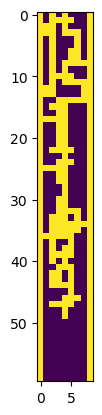

In [16]:
plt.imshow( game[top_of_pile-50:top_of_pile+10,:])

The cycle repeats.
Everytime a new input cycle ends, the end piece is 3 (from rock count mod5)

Try to plot them to see if there is any correlation

In [17]:
data

[(0, 10091, 1754, 2794, 3),
 (1, 20182, 3504, 5575, 3),
 (2, 30273, 5254, 8356, 3),
 (3, 40364, 7004, 11137, 3),
 (4, 50455, 8754, 13918, 3),
 (5, 60546, 10504, 16699, 3),
 (6, 70637, 12254, 19480, 3),
 (7, 80728, 14004, 22261, 3),
 (8, 90819, 15754, 25042, 3),
 (9, 100910, 17504, 27823, 3),
 (10, 111001, 19254, 30604, 3),
 (11, 121092, 21004, 33385, 3),
 (12, 131183, 22754, 36166, 3),
 (13, 141274, 24504, 38947, 3),
 (14, 151365, 26254, 41728, 3)]

## rocks

Text(0.5, 1.0, 'nrocks')

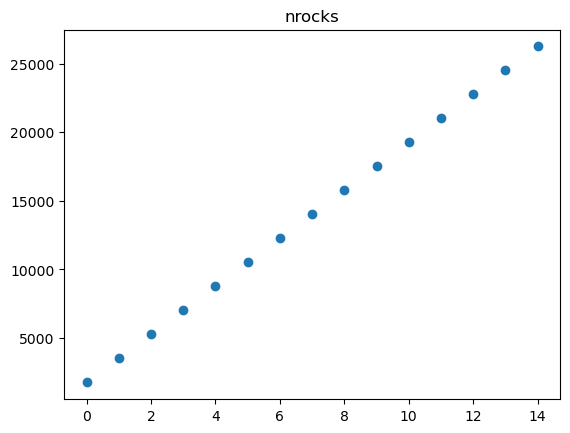

In [18]:
X=[]
Y=[]
for d0 in data:
    X.append(d0[0])
    Y.append(d0[2])
    title = "nrocks"

plt.scatter (X,Y)
plt.title(title)

In [19]:
from scipy import stats

nrocks_vs_i_lregr = stats.linregress(X,Y)

In [20]:
nrocks_vs_i_lregr

LinregressResult(slope=1750.0, intercept=1754.0, rvalue=1.0, pvalue=1.9648061969921602e-129, stderr=0.0, intercept_stderr=0.0)

In [21]:
print(nrocks_vs_i_lregr.slope)
print(nrocks_vs_i_lregr.intercept)

1750.0
1754.0


## top of pile

Text(0.5, 1.0, 'topofpile')

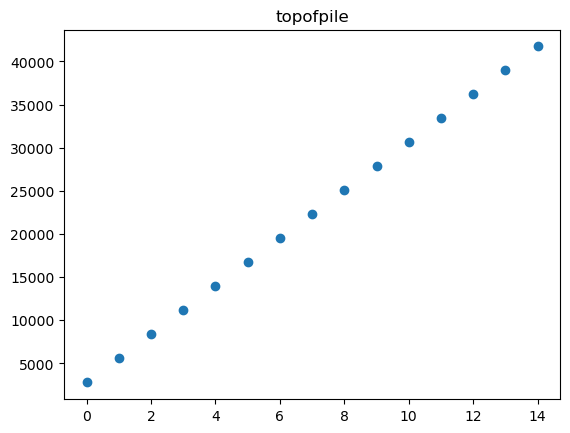

In [22]:
X=[]
Y=[]
for d0 in data:
    X.append(d0[0])
    Y.append(d0[3])
    title = "topofpile"

plt.scatter (X,Y)
plt.title(title)

In [23]:
from scipy import stats
topofpile_vs_i_lregr = stats.linregress(X,Y)

In [24]:
topofpile_vs_i_lregr

LinregressResult(slope=2781.0, intercept=2794.0, rvalue=1.0, pvalue=1.9648061969921602e-129, stderr=0.0, intercept_stderr=0.0)

Now that we have the correlation between the nrock and pile based in the number of cycles

We should try to figure out which ncycle corresponds to `1000000000000` rocks

From the linear regression nrock=slope*i+intercept <=> i=(nrock-intercept)/slope

In [25]:
irock_float = (1000000000000 - nrocks_vs_i_lregr.intercept)/ nrocks_vs_i_lregr.slope
irock_float

571428570.4262857

In [26]:
irock = int(irock_float)
irock

571428570

In [27]:
nrocks_for_this_irock = int(irock*nrocks_vs_i_lregr.slope + nrocks_vs_i_lregr.intercept)
nrocks_for_this_irock

999999999254

In [28]:
rocks_remaining = 1000000000000-nrocks_for_this_irock
rocks_remaining

746

So, need to run the code above in such a way that runs a full cycle from file, and then continue to drop further 746 rocks, just to get the additional height after the cycle completes

In [29]:
game_height = 10000
game = np.zeros((game_height,9), dtype=bool)
#walls
game[:,0]=True
game[:,8]=True
#Bottom
game[0,:]= True

#Implement a rotating list with collections dequeue
pieces = (piece0, piece1, piece2, piece3, piece4)

rock_count = 0
curpiece = None
top_of_pile= 1 #Starting top_of_pile value
nmoves_from_input = 0

input_count=0

bContinueDropping=True

top_of_pile_values = []

while bContinueDropping:
    input_count+=1
    rock_count_from_input_start=0
    height_cycle1=0

    for input0 in input_bin:
        
        if curpiece is None:
            #Respawn a new piece
            rock_count+=1
            rock_count_from_input_start+=1

            if rock_count_from_input_start> rocks_remaining and input_count==2:
                print(f"In second loop and reached rock_count_from_input_start above {rocks_remaining}. Stop here")
                bContinueDropping=False #Exit the while loop
                break #exits the for loop

            #Spawn new piece
            piece_pos_y = top_of_pile+3
            piece_pos_x = 3

            curpiece, curpiece_height = pieces[ (rock_count-1) % 5] #Use mode rather than dequeue

            #print(f"{rock_count}: Top of pile {top_of_pile}, new piece, at {piece_pos_x},{piece_pos_y}")

        #Try a jet push sideways
        jetmove = MOVE_LEFT
        if input0==True:
            jetmove=MOVE_RIGHT

        nmoves_from_input +=1

        #Check this side move is allowed
        if isMoveAllowed(curpiece, piece_pos_x, piece_pos_y,jetmove):
            #Make the move
            if jetmove==MOVE_RIGHT:
                piece_pos_x+=1
            else:
                piece_pos_x-=1
        
        #Move down
        if isMoveAllowed(curpiece, piece_pos_x, piece_pos_y,MOVE_DOWN):
            #Make the move
            piece_pos_y-=1
        else:
            #Move is not allowed, piece goes to rest
            #print("Down movement is not allowed, piece comes to rest")
            game[piece_pos_y:piece_pos_y+curpiece.shape[0], piece_pos_x:piece_pos_x+curpiece.shape[1] ] = np.logical_or(
                game[piece_pos_y:piece_pos_y+curpiece.shape[0], piece_pos_x:piece_pos_x+curpiece.shape[1] ] , curpiece
                )
            
            #Calculate new top of the pile based in location where piece came to rest and
            # its height, compared with previous height

            top_of_piece_rest = piece_pos_y + curpiece_height #do I need -1?
            top_of_pile = max(top_of_pile, top_of_piece_rest)

            #rock_count+=1
            curpiece=None #force new piece to be spawned

            #game_progress.append(game.copy())
    
    print(f"input_count:{input_count}, moves from input:{nmoves_from_input} , Completed rocks:{rock_count}, top_of_pile-1:{top_of_pile-1}, piece(mod5):{(rock_count-1) %5}")

    top_of_pile_values.append(top_of_pile-1)
    
additional_height = top_of_pile_values[1]- top_of_pile_values[0]
print(additional_height)

input_count:1, moves from input:10091 , Completed rocks:1754, top_of_pile-1:2794, piece(mod5):3
In second loop and reached rock_count_from_input_start above 746. Stop here
input_count:2, moves from input:14348 , Completed rocks:2501, top_of_pile-1:4013, piece(mod5):0
1219


This value will need to be added to the expected height after the several cycles (irock) above

The expected height can be calculated from the linear expression

In [30]:
height_i = int(topofpile_vs_i_lregr.slope * irock + topofpile_vs_i_lregr.intercept)
height_i

1589142855964

In [31]:
total_height = height_i+additional_height
total_height

1589142857183

THIS IS THE RIGHT ANSWER!!